HAR ANVÄNT MIG AV PREPROCESSING FRÅN samma fil som förra:

https://www.kaggle.com/code/amrabdellatif/brain-tumor-image-dataset-pytorch



och UNET från:

https://www.kaggle.com/code/wilbertch/mri-image-segmentation-unet




Andra att UNET undersöka som inte undersöks i denna notebook men som vi kan kolla på:

https://www.kaggle.com/code/moemnelhalose/brain-tumor-u-net-98

https://www.kaggle.com/code/nithunith/brain-tumor-unet



In [1]:
import os 
import glob
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
train_path = "train"
valid_path = "valid"

In [3]:
train_data=[image for image in os.listdir(train_path)]


In [ ]:
#torch.cuda.empty_cache()

In [ ]:
# creating mask from annotations
import json
import numpy as np
import skimage.draw
import tifffile
import os
import shutil
import matplotlib.pyplot as plt

def create_mask(image_info, annotations, output_folder, max_print=3):
    # Create an empty mask as a numpy array
    mask_np = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
#     print(mask_np.shape)

    # Counter for the object number
    object_number = 1

    printed_masks = 0  # Counter for the number of printed masks

    for ann in annotations:
        if ann['image_id'] == image_info['id']:
#             print(f"Processing annotation for image {image_info['file_name']}: {ann}")
            # Extract segmentation polygon
            for seg_idx, seg in enumerate(ann['segmentation']):
#                 print(f"Segmentation points: {seg}")
                # Convert polygons to a binary mask and add it to the main mask
                rr, cc = skimage.draw.polygon(seg[1::2], seg[0::2], mask_np.shape)
                # Create a mask for each segmentation
                seg_mask = np.zeros_like(mask_np, dtype=np.uint8)
                seg_mask[rr, cc] = 255  # Set the pixel values to 255 for the polygon
                # Save the segmentation mask
                mask_path = os.path.join(output_folder, f"{image_info['file_name'].replace('.jpg', '')}_seg_{seg_idx}.tif")
                tifffile.imwrite(mask_path, seg_mask)
#                 print(f"Saved segmentation mask for {image_info['file_name']} segment {seg_idx} to {mask_path}")
                
                # Print the segmentation mask using imshow
                # plt.imshow(seg_mask, cmap='gray')
                # plt.title(f"Segmentation Mask for {image_info['file_name']} Segment {seg_idx}")
                # plt.show()
                
                printed_masks += 1
                if printed_masks >= max_print:
                    return  # Exit the function if maximum number of masks to print is reached

#     print("All segmentation masks saved.")

In [ ]:
# main function to create datasets
def main(json_file, mask_output_folder, image_output_folder, original_image_dir):
    # Load COCO JSON annotations
    with open(json_file, 'r') as f:
        data = json.load(f)

    images = data['images']
    annotations = data['annotations']

    # Ensure the output directories exist
    if not os.path.exists(mask_output_folder):
        os.makedirs(mask_output_folder)
    if not os.path.exists(image_output_folder):
        os.makedirs(image_output_folder)

    for img in images:
        # Create the masks
        create_mask(img, annotations, mask_output_folder)
        
        # Copy original images to the specified folder
        original_image_path = os.path.join(original_image_dir, img['file_name'])
    
        new_image_path = os.path.join(image_output_folder, os.path.basename(original_image_path))
        shutil.copy2(original_image_path, new_image_path)
#         print(f"Copied original image to {new_image_path}")

In [ ]:
# ONLY NEEDED ONCE: Calling main function to create datasets 

# original_image_dir = 'test'  # Where your original images are stored
# json_file = 'test/_annotations.coco.json'
# mask_output_folder = 'test2/masks'  # Modify this as needed. Using val2 so my data is not overwritten
# image_output_folder = 'test2/images'  # 
# main(json_file, mask_output_folder, image_output_folder, original_image_dir)


# original_image_dir = 'train'  # Where your original images are stored
# json_file = 'train/_annotations.coco.json'
# mask_output_folder = 'train2/masks'  # Modify this as needed. Using val2 so my data is not overwritten
# image_output_folder = 'train2/images'  # 
# main(json_file, mask_output_folder, image_output_folder, original_image_dir)

# original_image_dir = 'valid'  # Where your original images are stored
# json_file = 'valid/_annotations.coco.json'
# mask_output_folder = 'valid2/masks'  # Modify this as needed. Using val2 so my data is not overwritten
# image_output_folder = 'valid2/images'  # 
# main(json_file, mask_output_folder, image_output_folder, original_image_dir)

"I found a problem within train dataset .. there's an image that doesnt have a corresponding mask so im making a function to search and grab that file and delete it"

In [ ]:
# import os

# def compare_folders_and_delete(folder1_path, folder2_path):
#     folder1_items = os.listdir(folder1_path)
#     folder2_items = os.listdir(folder2_path)

#     for item1 in folder1_items:
#         found = False
#         for item2 in folder2_items:
#             if item1[:4] == item2[:4]:
#                 found = True
#                 break
#         if not found:
#             print(f"Corresponding item for {item1} not found.")
#             item1_path = os.path.join(folder1_path, item1)
#             os.remove(item1_path)
#             print(f"Deleted {item1}")

#     for item2 in folder2_items:
#         found = False
#         for item1 in folder1_items:
#             if item2[:4] == item1[:4]:
#                 found = True
#                 break
#         if not found:
#             print(f"Corresponding item for {item2} not found.")
#             item2_path = os.path.join(folder2_path, item2)
#             os.remove(item2_path)
#             print(f"Deleted {item2}")

# # Example usage:
# folder1_path = "train2/images"
# folder2_path = "train2/masks"
# compare_folders_and_delete(folder1_path, folder2_path)

In [ ]:
# import os
# from torch.utils.data import DataLoader, Dataset
# from torchvision import transforms
# from PIL import Image

# class CustomDataset_general(Dataset):
#     def __init__(self, root_dir, transform=None, maskTransform=None):
#         self.root_dir = root_dir
#         self.image_folder = os.path.join(root_dir, "images")
#         self.mask_folder = os.path.join(root_dir, "masks")
#         self.image_files = sorted(os.listdir(self.image_folder))
#         self.mask_files = sorted(os.listdir(self.mask_folder))
#         self.transform = transform
#         self.maskTransform = maskTransform

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         # Read image
#         img_name = self.image_files[idx]
#         img_path = os.path.join(self.image_folder, img_name)
#         image = Image.open(img_path).convert("RGB")
#         image_gray = image.convert("L")  # Convert to grayscale

#         # Read corresponding mask
#         mask_name = self.mask_files[idx]
#         mask_path = os.path.join(self.mask_folder, mask_name)
#         mask = Image.open(mask_path).convert("L")

#         if self.transform:
#             # Apply transformations
#             image_gray = self.transform(image_gray)
#             mask = self.maskTransform(mask)

#         return image_gray, mask

# # Define paths for train, validation, and test sets
# train_path = "train2" 
# valid_path = "valid2"
# test_path = "test2"

# # Define transformations
# image_transform = transforms.Compose([
#     transforms.Resize(224),
#     transforms.Grayscale(num_output_channels=3),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Assuming grayscale images
#     transforms.Lambda(lambda x: x.clamp(0, 1))
# ])

# mask_transform = transforms.Compose([
#     transforms.Resize(224), 
#     transforms.ToTensor(), 
#     transforms.Lambda(lambda x: x.clamp(0, 1))
# ])


# # Create datasets
# train_dataset = CustomDataset_general(train_path, transform=image_transform, maskTransform=mask_transform)
# valid_dataset = CustomDataset_general(valid_path, transform=image_transform, maskTransform=mask_transform)
# # test_dataset = CustomDataset_general(test_path, transform=image_transform)

# # Create data loaders
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
# # test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
import os
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torchvision import transforms
from torchvision.transforms.functional import rotate, resized_crop
from PIL import Image
import random

class RandomResizedCropPair:
    def __init__(self, size, scale=(0.08, 1.0), ratio=(3/4, 4/3)):
        self.size = size
        self.scale = scale
        self.ratio = ratio

    def __call__(self, img, mask):
        i, j, h, w = transforms.RandomResizedCrop.get_params(img, self.scale, self.ratio)
        
        img = resized_crop(img, i, j, h, w, self.size)
        mask = resized_crop(mask, i, j, h, w, self.size)
        
        return img, mask

class RandomRotate:
    def __init__(self, degrees):
        if isinstance(degrees, (int, float)):  # Handle the case where a single number is passed
            self.degrees = (-degrees, degrees)  # Use negative and positive range
        else:
            self.degrees = degrees

    def __call__(self, img, mask):
        angle = random.uniform(self.degrees[0], self.degrees[1])
        img = rotate(img, angle)
        mask = rotate(mask, angle)
        return img, mask

class CustomDataset_general(Dataset):
    def __init__(self, root_dir, transform=None, maskTransform=None, rotation_degrees=0, use_crop=False, crop_size=(224, 224)):
        self.root_dir = root_dir
        self.image_folder = os.path.join(root_dir, "images")
        self.mask_folder = os.path.join(root_dir, "masks")
        self.image_files = sorted(os.listdir(self.image_folder))
        self.mask_files = sorted(os.listdir(self.mask_folder))
        
        # Ensure rotation_degrees is always a tuple
        if isinstance(rotation_degrees, (int, float)):
            rotation_degrees = (-rotation_degrees, rotation_degrees)
        self.rotation = RandomRotate(degrees=rotation_degrees)
        
        self.transform = transform
        self.maskTransform = maskTransform
        self.use_crop = use_crop  # Whether to apply RandomResizedCropPair
        self.random_resized_crop = RandomResizedCropPair(size=crop_size) if use_crop else None

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Read image
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert("RGB")
        image_gray = image.convert("L")  # Convert to grayscale

        # Read corresponding mask
        mask_name = self.mask_files[idx]
        mask_path = os.path.join(self.mask_folder, mask_name)
        mask = Image.open(mask_path).convert("L")

        # Apply synchronized random rotation
        image_gray, mask = self.rotation(image_gray, mask)

        # Apply synchronized random resized crop (if enabled)
        if self.use_crop:
            image_gray, mask = self.random_resized_crop(image_gray, mask)

        # Apply transformations
        if self.transform:
            image_gray = self.transform(image_gray)
        if self.maskTransform:
            mask = self.maskTransform(mask)

        return image_gray, mask

# Define paths for train, validation, and test sets
train_path = "train2" 
valid_path = "valid2"
test_path = "test2"

# Define transformations
image_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

mask_transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor(), 
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

image_transform_plot = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

mask_transform_plot = transforms.Compose([
    transforms.Resize(224), 
    transforms.ToTensor(), 
    transforms.Lambda(lambda x: x.clamp(0, 1))
])

# Combine datasets with different rotation angles and synchronized RandomResizedCrop for some datasets
angle = [(0, 0), (0, 90), (90, 180), (-1, 1)]  # Ensure all angles are tuples
all_datasets = []
for a in angle:
    use_crop = a in [(0, 90), (90, 180), (-1, 1)]  # Apply RandomResizedCrop for some rotations
    all_datasets.append(CustomDataset_general(train_path, transform=image_transform, maskTransform=mask_transform, rotation_degrees=a, use_crop=use_crop))

train_dataset = ConcatDataset(all_datasets)

# Create validation dataset
valid_dataset = CustomDataset_general(valid_path, transform=image_transform, maskTransform=mask_transform, rotation_degrees=(0, 0))
valid_dataset_plot = CustomDataset_general(valid_path, transform=image_transform_plot, maskTransform=mask_transform_plot)
# Create data loaders
train_loader = DataLoader(train_dataset, shuffle=True, num_workers=6, batch_size=64, pin_memory=True)
valid_loader = DataLoader(valid_dataset, shuffle=False, num_workers=6, batch_size=64, pin_memory=False)
valid_loader_plot = DataLoader(valid_dataset_plot, shuffle=False, num_workers=6, batch_size=64, pin_memory=False)

To find optimal value of num_workers for the dataloader. Code from: https://chtalhaanwar.medium.com/pytorch-num-workers-a-tip-for-speedy-training-ed127d825db7

In [ ]:
# from time import time
# import multiprocessing as mp

# for num_workers in tqdm(range(2, mp.cpu_count(), 2)):  
#     train_loader = DataLoader(train_dataset, shuffle=True, num_workers=num_workers, batch_size=32, pin_memory=True)

#     start = time()  # Start the timer here
#     for epoch in range(1, 3):
#         for i, data in enumerate(train_loader, 0):
#             pass  # Simulate the training loop
#     end = time()  # End the timer after the training loop finishes

#     print(f"Finish with: {end - start:.2f} seconds, num_workers={num_workers}")


In [ ]:
x, y = next(iter(train_loader))
x.shape , y.shape , type(x) , type(y)

In [6]:
# lets take a look at the data inside dataloaders and make sure it within range of [0,1] 

# Assuming x is a tensor from your DataLoader
# x, y = next(iter(train_loader))
import torch
# Count number of ones and zeros in tensor x
num_ones = torch.eq(x, 1).sum().item()
num_zeros = x.numel() - num_ones

print("Number of ones in x:", num_ones)
print("Number of zeros in x:", num_zeros)

# Count number of ones and zeros in tensor y
num_ones = torch.eq(y, 1).sum().item()
num_zeros = y.numel() - num_ones

print("Number of ones in y:", num_ones)
print("Number of zeros in y:", num_zeros)

Number of ones in x: 637243
Number of zeros in x: 8996549
Number of ones in y: 244524
Number of zeros in y: 2966740


In [ ]:
# Convert tensors to numpy arrays and permute dimensions if channels > 1
x_np = x.numpy().transpose(0, 2, 3, 1)  # Shape: (batch_size, height, width, channels)
y_np = y.numpy().transpose(0, 2, 3, 1)

# Plot the images
plt.figure(figsize=(10, 5))

# Plot original images
for i in range(4):
    plt.subplot(2, 4, i + 1)
    if x_np.shape[-1] == 1:  # If grayscale
        plt.imshow(x_np[i].squeeze(), cmap='gray')
    else:  # If multi-channel (e.g., RGB)
        plt.imshow(x_np[i])
    plt.title('Original Image')
    plt.axis('off')

# Plot masks
for i in range(4):
    plt.subplot(2, 4, i + 5)
    if y_np.shape[-1] == 1:  # If grayscale
        plt.imshow(y_np[i].squeeze(), cmap='gray')
    else:  # If multi-channel
        plt.imshow(y_np[i])
    plt.title('Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()


HÄRIFRÅN OCH NER ÄR TAGET FRÅN https://www.kaggle.com/code/wilbertch/mri-image-segmentation-unet // Richard

In [7]:
import torch
from torchvision import datasets
#from torchmetrics.classification import JaccardIndex
from torch.utils.data import Dataset ,DataLoader
from torchvision.transforms import ToTensor
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.optim import lr_scheduler

UNET VERKAR ANVÄNDA DICE LOSS SOM ÄR NGN FÖRBÄTTRING AV crossentropy loss https://cvinvolution.medium.com/dice-loss-in-medical-image-segmentation-d0e476eb486

In [8]:
import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()
        
    def forward(self, y_pred, y_true):
        # Apply softmax if using class logits to get probabilities
        y_pred = torch.softmax(y_pred, dim=1)  # Convert to probabilities
        smooth = 1.0

        # Get the probabilities for the positive class
        y_pred_pos = y_pred[:, 1, :, :]  # Assuming class 1 is the positive class
        y_true = (y_true > 0).float()  # Convert mask to float (binary)

        intersection = (y_pred_pos * y_true).sum()
        dic_loss = 1 - (2.0 * intersection + smooth) / (y_pred_pos.sum() + y_true.sum() + smooth)

        return dic_loss


In [9]:
from transformers import SegformerForSemanticSegmentation
import torch.nn.functional as F
from tqdm import tqdm

model = SegformerForSemanticSegmentation.from_pretrained(
    "nvidia/segformer-b1-finetuned-ade-512-512", 
    num_labels=2, 
    ignore_mismatched_sizes=True
)

config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b1-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([2, 256, 1, 1]) in the model instantiated
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
for param in model.segformer.parameters():
    param.requires_grad = True

# Only the segmentation head's parameters will be fine-tuned
for param in model.decode_head.parameters():
    param.requires_grad = True

In [11]:
from sklearn.metrics import f1_score
from torch.optim.lr_scheduler import ReduceLROnPlateau
import os
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn.functional as F

# Define your train and validation functions
def train(model, device, optimizer, loss_fn, loader):
    running_loss = 0.0
    f1_scores = []
    model.train()
    
    for images, masks in tqdm(loader):  
        images, masks = images.to(device), masks.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images).logits 
        outputs = F.interpolate(outputs, size=(224, 224), mode='bilinear', align_corners=False)
        
        true_masks = masks.squeeze(1)  # Shape: [batch_size, 224, 224]
        true_masks = true_masks.long()  # Convert to long for loss function
        
        loss = loss_fn(outputs, true_masks)  
        loss.backward() 
        optimizer.step()
        
        running_loss += loss.item()
        
        # F1 score calculation
        preds = torch.argmax(outputs, dim=1)  # Get predicted classes (multi-class case)
        
        preds = preds.cpu().numpy().reshape(-1)
        true_masks_np = true_masks.cpu().numpy().reshape(-1)
        
        f1 = f1_score(true_masks_np, preds)
        f1_scores.append(f1)
    
    avg_f1 = sum(f1_scores) / len(f1_scores)
    return running_loss / len(loader), avg_f1

def valid(model, device, loss_fn, loader):
    running_loss = 0.0
    f1_scores = []
    model.eval()

    with torch.no_grad():
        for images, masks in tqdm(loader):
            images, masks = images.to(device), masks.to(device)
            
            outputs = model(images).logits 
            outputs = F.interpolate(outputs, size=(224, 224), mode='bilinear', align_corners=False)
        
            true_masks = masks.squeeze(1)
            true_masks = true_masks.long()  
            
            loss = loss_fn(outputs, true_masks) 
            running_loss += loss.item()
            
            # F1 score calculation
            preds = torch.argmax(outputs, dim=1)  # Get predicted classes (multi-class case)
            preds = preds.cpu().numpy().reshape(-1)
            true_masks_np = true_masks.cpu().numpy().reshape(-1)
            
            f1 = f1_score(true_masks_np, preds)  
            f1_scores.append(f1)
    
    avg_f1 = sum(f1_scores) / len(f1_scores)
    return running_loss / len(loader), avg_f1

In [19]:
# Set up directories and save metrics
save_dir = "metrics"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

def train_model(model, device, optimizer, loss_fn, scheduler, epochs, train_loader, valid_loader):
    model.to(device)
    train_loss = []
    valid_loss = []
    f1_score_train = []
    f1_score_valid = []
    best_f1_score_valid = 0
    best_epoch_index = 0
    for epoch in range(epochs):
        train_epoch_loss, f1_train = train(model, device, optimizer, loss_fn, train_loader)
        valid_epoch_loss, f1_valid = valid(model, device, loss_fn, valid_loader)

        train_loss.append(train_epoch_loss)
        valid_loss.append(valid_epoch_loss)
        f1_score_train.append(f1_train)
        f1_score_valid.append(f1_valid)

        if f1_valid > best_f1_score_valid:
            print(f"New best f1: {f1_valid}, Epoch: {epoch}")
            best_f1_score_valid = f1_valid
            best_epoch_index = epoch
            torch.save(model.state_dict(), 'best-model-parameters_b1_wdataaugplus20plus10.pt')
            
        # Step the scheduler based on validation loss
        scheduler.step(valid_epoch_loss)

        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_epoch_loss:.4f}, Validation Loss: {valid_epoch_loss:.4f}, F1 train: {f1_train:.4f}, F1 valid: {f1_valid:.4f}")

    return train_loss, valid_loss, f1_score_train, f1_score_valid, best_epoch_index

# Initialize device, model, optimizer, loss function, and scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
loss_fn = DiceLoss()  
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

# Set number of epochs and train the model
epochs = 10
train_loss, valid_loss, f1_score_train, f1_score_valid, best_epoch_index = train_model(model, device, optimizer, loss_fn, scheduler, epochs, train_loader, valid_loader)

# Save metrics to CSV
df_metrics = pd.DataFrame({
    'epoch': list(range(1, epochs + 1)),
    'train_loss': train_loss,
    'val_loss': valid_loss,
    'train_f1': f1_score_train,
    'val_f1': f1_score_valid,
    'best_epoch': best_epoch_index
})

# Save DataFrame to CSV
metrics_file = os.path.join(save_dir, "training_metrics_b1_wdataaugplus20plus10.csv")
df_metrics.to_csv(metrics_file, index=False)

print(f"Metrics saved to {metrics_file}")

100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.51it/s]


New best f1: 0.752212818501812, Epoch: 0
Epoch [1/10], Training Loss: 0.1966, Validation Loss: 0.2487, F1 train: 0.8045, F1 valid: 0.7522


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.61it/s]


Epoch [2/10], Training Loss: 0.2008, Validation Loss: 0.2531, F1 train: 0.8004, F1 valid: 0.7480


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.53it/s]


Epoch [3/10], Training Loss: 0.1939, Validation Loss: 0.2554, F1 train: 0.8071, F1 valid: 0.7459


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.52it/s]


Epoch [4/10], Training Loss: 0.2004, Validation Loss: 0.2520, F1 train: 0.8007, F1 valid: 0.7490


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.52it/s]


New best f1: 0.7549088463065905, Epoch: 4
Epoch [5/10], Training Loss: 0.2017, Validation Loss: 0.2466, F1 train: 0.7993, F1 valid: 0.7549


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.47it/s]


New best f1: 0.7556428136523642, Epoch: 5
Epoch [6/10], Training Loss: 0.1954, Validation Loss: 0.2455, F1 train: 0.8056, F1 valid: 0.7556


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.52it/s]


New best f1: 0.7588798038172382, Epoch: 6
Epoch [7/10], Training Loss: 0.1942, Validation Loss: 0.2423, F1 train: 0.8068, F1 valid: 0.7589


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.53it/s]


New best f1: 0.7593297486558803, Epoch: 7
Epoch [8/10], Training Loss: 0.1893, Validation Loss: 0.2417, F1 train: 0.8117, F1 valid: 0.7593


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.59it/s]


Epoch [9/10], Training Loss: 0.1933, Validation Loss: 0.2480, F1 train: 0.8076, F1 valid: 0.7531


100%|██████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.52it/s]

Epoch [10/10], Training Loss: 0.1958, Validation Loss: 0.2505, F1 train: 0.8052, F1 valid: 0.7506
Metrics saved to metrics/training_metrics_b1_wdataaugplus20plus10.csv


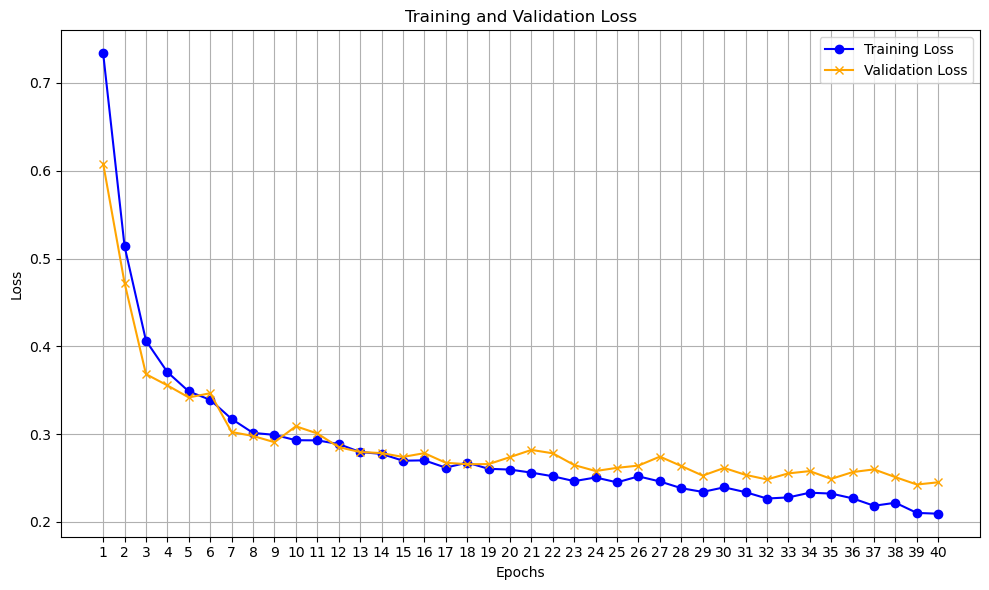

In [13]:
import matplotlib.pyplot as plt

def plot_metric(val_loss, train_loss):
    
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', color='orange', marker='x')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.xticks(epochs)  
    plt.tight_layout() 
    plt.show()

plot_metric(valid_loss, train_loss)

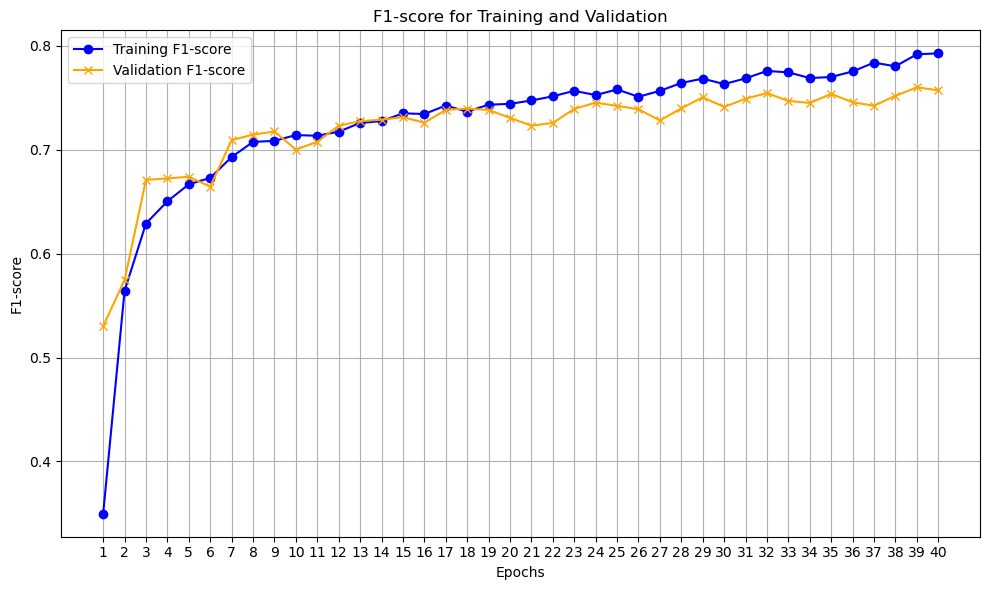

In [14]:
import matplotlib.pyplot as plt

def plot_metric(valid_f1, train_f1):
    
    epochs = range(1, len(train_f1) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_f1, label='Training F1-score', color='blue', marker='o')
    plt.plot(epochs, valid_f1, label='Validation F1-score', color='orange', marker='x')

    plt.title('F1-score for Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('F1-score')
    plt.legend()
    plt.grid(True)
    plt.xticks(epochs)  
    plt.tight_layout() 
    plt.show()

plot_metric(f1_score_valid, f1_score_train)